In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
# import csv

In [4]:
files = './cs466project/data'
count = 0
file_list = []
for file in os.walk(files):
    if count > 0:
        f_n = file[0][20:]
#         print(count,f_n)
        file_list.append(f_n)
    count += 1

In [5]:
# 1. Relative Entropy between “motif.txt” and “predictedmotif.txt” 
for file in file_list:
    motif_file_path = './cs466project/data/'+ file +'/motif.txt'
    predictmotif_file_path = './cs466project/results/'+ file +'/motif.txt'
    relativeEntropy_file_path = './cs466project/results/'+ file + '/relativeEntropy.txt'
    
    d = open(motif_file_path, 'r')
    r = open(predictmotif_file_path, 'r')
    length_d = int(d.readline().split()[1])
    length_r = int(r.readline().split()[1])
    relativeEntropy = 0
    for i in range(length_d):
        row_q = d.readline().split()
        row_q = np.float32(row_q)
        row_p = r.readline().split()
        row_p = np.float32(row_p)
        for j in range(4):
            q = row_q[j]
            p = row_p[j]
            if q == 0:
                q = 0.00001
            if p == 0:
                p = 0.00001
            re = p * np.log(p/q)
            relativeEntropy += re
    with open(relativeEntropy_file_path, 'w') as re:
        re.write(str(relativeEntropy))

In [6]:
# 2. Number of overlapping positions or overlapping sites between “sites.txt” and “predictedsites.txt”.
for file in file_list:
    site_file_path = './cs466project/data/'+ file +'/sites.txt'
    preditsite_file_path = './cs466project/results/'+ file +'/sites.txt'
    overlap_file_path = './cs466project/results/'+ file +'/overlap_count.txt'
    d = open(site_file_path, 'r')
    r = open(preditsite_file_path, 'r')
    row_d = d.readline()
    row_r = r.readline()
    row_d = row_d.split(',')
    row_d.pop()
    row_r = row_r.split(',')
    row_r.pop()
    length = len(row_r)
    overlap_count = 0
    for i in range(0, len(row_d)):
        if row_d[i] == row_r[i]:
            overlap_count += 1
    with open(overlap_file_path, 'w') as ol:
        ol.write(str(overlap_count)+' '+str(length))

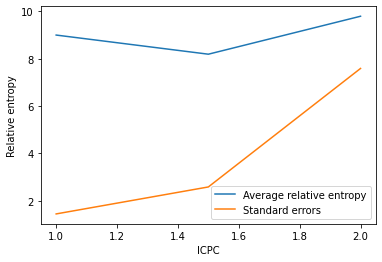

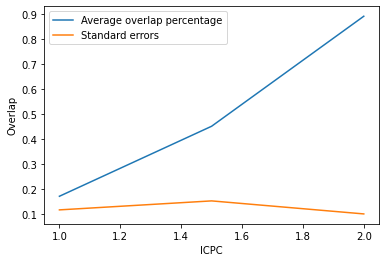

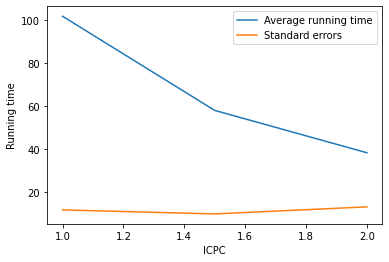

In [7]:
# icpc stat
# default “ICPC = 2, ML = 8, SL = 500, SC = 10”
icpc = [1, 1.5, 2]

re_mean_list = []
re_se_list = []
ol_mean_list = []
ol_se_list = []
t_mean_list = []
t_se_list = []


for ic in icpc:
    re_list = []
    ol_list = []
    t_list = []
    for i in range(1,11):
        cur_file = './cs466project/results/dataset' + str(i)+'_icpc'+ str(ic) + '_ml8_sl500_sc10'
        relativeEntropy_file = cur_file + '/relativeEntropy.txt'
        overlap_file = cur_file + '/overlap_count.txt'
        runtime_file = cur_file + '/time.txt'

        re = open(relativeEntropy_file,'r')
        re_num = float(re.readline())
        re_list.append(re_num)
        
        ol = open(overlap_file,'r')
        ol_num = ol.readline().split()
        ol_list.append(float(ol_num[0])/float(ol_num[1]))
        
        
        t = open(runtime_file,'r')
        time_list = t.readline().split(':')
        t_num = float(time_list[0])*3600 + float(time_list[1])*60 + float(time_list[2])
        t_list.append(t_num)
    
    
    re_arr = np.array(re_list)
    re_mean = np.average(re_arr)
    re_se_arr = np.std(re_arr, ddof=1) / np.sqrt(np.size(re_arr))
    re_mean_list.append(re_mean)
    re_se_list.append(re_se_arr)
    
    ol_arr = np.array(ol_list)
    ol_mean = np.average(ol_arr)
    ol_se_arr = np.std(ol_arr, ddof=1) / np.sqrt(np.size(ol_arr))
    ol_mean_list.append(ol_mean)
    ol_se_list.append(ol_se_arr)
    
    t_arr = np.array(t_list)
    t_mean = np.average(t_arr)
    t_se_arr = np.std(t_arr, ddof=1) / np.sqrt(np.size(t_arr))
    t_mean_list.append(t_mean)
    t_se_list.append(t_se_arr)

    

plt.plot(icpc, re_mean_list, label='Average relative entropy')
plt.plot(icpc, re_se_list, label="Standard errors")
plt.xlabel('ICPC')
plt.ylabel('Relative entropy')
plt.legend()
plt.show()

plt.plot(icpc, ol_mean_list, label="Average overlap percentage")
plt.plot(icpc, ol_se_list, label="Standard errors")
plt.xlabel('ICPC')
plt.ylabel('Overlap')
plt.legend()
plt.show()

plt.plot(icpc, t_mean_list, label="Average running time")
plt.plot(icpc, t_se_list, label="Standard errors")
plt.xlabel('ICPC')
plt.ylabel('Running time')
plt.legend()
plt.show()

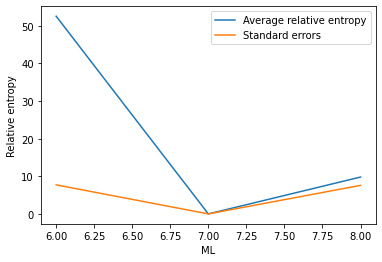

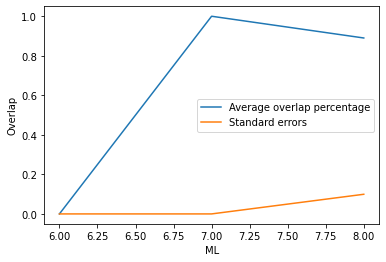

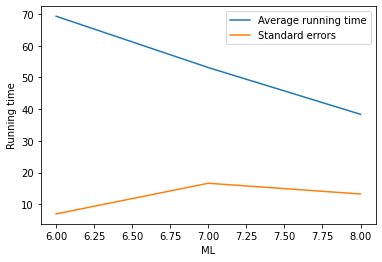

In [8]:
# ml
# default “ICPC = 2, ML = 8, SL = 500, SC = 10”
ml = [6, 7, 8]

re_mean_list_ml = []
re_se_list_ml = []
ol_mean_list_ml = []
ol_se_list_ml = []
t_mean_list_ml = []
t_se_list_ml = []


for m in ml:
    re_list = []
    ol_list = []
    t_list = []
    for i in range(1,11):
        cur_file = './cs466project/results/dataset' + str(i)+'_icpc2_ml'+ str(m)+ '_sl500_sc10'
        relativeEntropy_file = cur_file + '/relativeEntropy.txt'
        overlap_file = cur_file + '/overlap_count.txt'
        runtime_file = cur_file + '/time.txt'

        re = open(relativeEntropy_file,'r')
        re_num = float(re.readline())
        re_list.append(re_num)
        
        ol = open(overlap_file,'r')
        ol_num = ol.readline().split()
        ol_list.append(float(ol_num[0])/float(ol_num[1]))
        
        t = open(runtime_file,'r')
        time_list = t.readline().split(':')
        t_num = float(time_list[0])*3600 + float(time_list[1])*60 + float(time_list[2])
        t_list.append(t_num)

    re_arr = np.array(re_list)
    re_mean = np.average(re_arr)
    re_se_arr = np.std(re_arr, ddof=1) / np.sqrt(np.size(re_arr))
    re_mean_list_ml.append(re_mean)
    re_se_list_ml.append(re_se_arr)
    
    ol_arr = np.array(ol_list)
    ol_mean = np.average(ol_arr)
    ol_se_arr = np.std(ol_arr, ddof=1) / np.sqrt(np.size(ol_arr))
    ol_mean_list_ml.append(ol_mean)
    ol_se_list_ml.append(ol_se_arr)
    
    
    t_arr = np.array(t_list)
    t_mean = np.average(t_arr)
    t_se_arr = np.std(t_arr, ddof=1) / np.sqrt(np.size(t_arr))
    t_mean_list_ml.append(t_mean)
    t_se_list_ml.append(t_se_arr)
    
plt.plot(ml, re_mean_list_ml, label="Average relative entropy")
plt.plot(ml, re_se_list_ml, label="Standard errors")
plt.xlabel('ML')
plt.ylabel('Relative entropy')
plt.legend()
plt.show()

plt.plot(ml, ol_mean_list_ml, label="Average overlap percentage")
plt.plot(ml, ol_se_list_ml, label="Standard errors")
plt.xlabel('ML')
plt.ylabel('Overlap')
plt.legend()
plt.show()

plt.plot(ml, t_mean_list_ml, label="Average running time")
plt.plot(ml, t_se_list_ml, label="Standard errors")
plt.xlabel('ML')
plt.ylabel('Running time')
plt.legend()
plt.show()

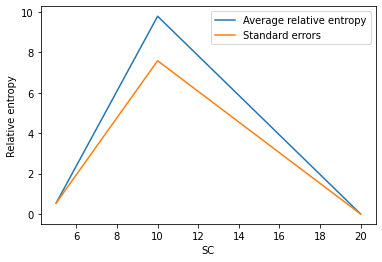

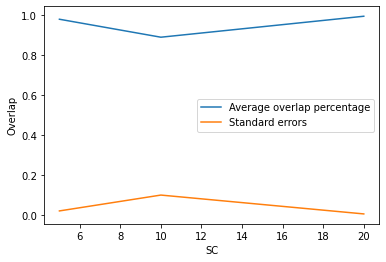

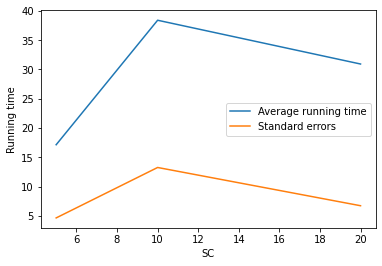

In [9]:
# sc
# default “ICPC = 2, ML = 8, SL = 500, SC = 10”
sc = [5, 10, 20]

re_mean_list_sc = []
re_se_list_sc = []
ol_mean_list_sc = []
ol_se_list_sc = []
t_mean_list_sc = []
t_se_list_sc = []

for s in sc:
    re_list = []
    ol_list = []
    t_list = []
    for i in range(1,11):
        cur_file = './cs466project/results/dataset' + str(i)+'_icpc2_ml8_sl500_sc' + str(s)
        relativeEntropy_file = cur_file + '/relativeEntropy.txt'
        overlap_file = cur_file + '/overlap_count.txt'
        runtime_file = cur_file + '/time.txt'

        re = open(relativeEntropy_file,'r')
        re_num = float(re.readline())
        re_list.append(re_num)
        
        ol = open(overlap_file,'r')
        ol_num = ol.readline().split()
        ol_list.append(float(ol_num[0])/float(ol_num[1]))
        
        t = open(runtime_file,'r')
        time_list = t.readline().split(':')
        t_num = float(time_list[0])*3600 + float(time_list[1])*60 + float(time_list[2])
        t_list.append(t_num)
           
    re_arr = np.array(re_list)
    re_mean = np.average(re_arr)
    re_se_arr = np.std(re_arr, ddof=1) / np.sqrt(np.size(re_arr))
    re_mean_list_sc.append(re_mean)
    re_se_list_sc.append(re_se_arr)

    ol_arr = np.array(ol_list)
    ol_mean = np.average(ol_arr)
    ol_se_arr = np.std(ol_arr, ddof=1) / np.sqrt(np.size(ol_arr))
    ol_mean_list_sc.append(ol_mean)
    ol_se_list_sc.append(ol_se_arr)
    

    t_arr = np.array(t_list)
    t_mean = np.average(t_arr)
    t_se_arr = np.std(t_arr, ddof=1) / np.sqrt(np.size(t_arr))
    t_mean_list_sc.append(t_mean)
    t_se_list_sc.append(t_se_arr)
    
plt.plot(sc, re_mean_list_sc, label="Average relative entropy")
plt.plot(sc, re_se_list_sc, label="Standard errors")
plt.xlabel('SC')
plt.ylabel('Relative entropy')
plt.legend()
plt.show()

plt.plot(sc, ol_mean_list_sc, label="Average overlap percentage")
plt.plot(sc, ol_se_list_sc, label="Standard errors")
plt.xlabel('SC')
plt.ylabel('Overlap')
plt.legend()
plt.show()

plt.plot(sc, t_mean_list_sc, label="Average running time")
plt.plot(sc, t_se_list_sc, label="Standard errors")
plt.xlabel('SC')
plt.ylabel('Running time')
plt.legend()
plt.show()